In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.precision',3)
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv',index_col="id")
test = pd.read_csv('test.csv',index_col="id")
print("shape of training data:", train.shape)
print("shape of test data", test.shape)

shape of training data: (19219, 34)
shape of test data (12814, 27)


Inspecting data

In [3]:
# No missing_values in the training data
train.isnull().sum().to_frame().transpose()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# No missing_values in the test data
train.isnull().sum().to_frame().transpose()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
col_unique_train =[]
for col in train.columns:
    n_unique_train = len(np.unique(train[col]))
    col_unique_train.append([col, n_unique_train , train[col].dtype])

col_unique_train

col_unique_test = []
for col in test.columns:
    n_unique_test = len(np.unique(test[col]))
    col_unique_test.append([col, n_unique_test, test[col].dtype])

col_unique_test

[['X_Minimum', 1131, dtype('int64')],
 ['X_Maximum', 1188, dtype('int64')],
 ['Y_Minimum', 2781, dtype('int64')],
 ['Y_Maximum', 2827, dtype('int64')],
 ['Pixels_Areas', 1070, dtype('int64')],
 ['X_Perimeter', 435, dtype('int64')],
 ['Y_Perimeter', 316, dtype('int64')],
 ['Sum_of_Luminosity', 2300, dtype('int64')],
 ['Minimum_of_Luminosity', 161, dtype('int64')],
 ['Maximum_of_Luminosity', 99, dtype('int64')],
 ['Length_of_Conveyer', 92, dtype('int64')],
 ['TypeOfSteel_A300', 2, dtype('int64')],
 ['TypeOfSteel_A400', 2, dtype('int64')],
 ['Steel_Plate_Thickness', 24, dtype('int64')],
 ['Edges_Index', 1697, dtype('float64')],
 ['Empty_Index', 1606, dtype('float64')],
 ['Square_Index', 987, dtype('float64')],
 ['Outside_X_Index', 480, dtype('float64')],
 ['Edges_X_Index', 998, dtype('float64')],
 ['Edges_Y_Index', 788, dtype('float64')],
 ['Outside_Global_Index', 3, dtype('float64')],
 ['LogOfAreas', 994, dtype('float64')],
 ['Log_X_Index', 189, dtype('float64')],
 ['Log_Y_Index', 218, d

In [6]:
category_mapping = {'TypeOfSteel_A300' : 'category',
                    'TypeOfSteel_A400' : 'category',
                    'Outside_Global_Index': 'category'}

#converting datatype of categorical columns
train = train.astype(category_mapping)
test = test.astype(category_mapping)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19219 entries, 0 to 19218
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   X_Minimum              19219 non-null  int64   
 1   X_Maximum              19219 non-null  int64   
 2   Y_Minimum              19219 non-null  int64   
 3   Y_Maximum              19219 non-null  int64   
 4   Pixels_Areas           19219 non-null  int64   
 5   X_Perimeter            19219 non-null  int64   
 6   Y_Perimeter            19219 non-null  int64   
 7   Sum_of_Luminosity      19219 non-null  int64   
 8   Minimum_of_Luminosity  19219 non-null  int64   
 9   Maximum_of_Luminosity  19219 non-null  int64   
 10  Length_of_Conveyer     19219 non-null  int64   
 11  TypeOfSteel_A300       19219 non-null  category
 12  TypeOfSteel_A400       19219 non-null  category
 13  Steel_Plate_Thickness  19219 non-null  int64   
 14  Edges_Index            19219 non-null  floa

In [8]:
#separating features and targets
features = train.columns.to_list()[:-7]
targets = [ i for i in train.columns if i not in features]
pd.DataFrame(features).transpose()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas


In [9]:
features

['X_Minimum',
 'X_Maximum',
 'Y_Minimum',
 'Y_Maximum',
 'Pixels_Areas',
 'X_Perimeter',
 'Y_Perimeter',
 'Sum_of_Luminosity',
 'Minimum_of_Luminosity',
 'Maximum_of_Luminosity',
 'Length_of_Conveyer',
 'TypeOfSteel_A300',
 'TypeOfSteel_A400',
 'Steel_Plate_Thickness',
 'Edges_Index',
 'Empty_Index',
 'Square_Index',
 'Outside_X_Index',
 'Edges_X_Index',
 'Edges_Y_Index',
 'Outside_Global_Index',
 'LogOfAreas',
 'Log_X_Index',
 'Log_Y_Index',
 'Orientation_Index',
 'Luminosity_Index',
 'SigmoidOfAreas']

In [10]:
targets

['Pastry',
 'Z_Scratch',
 'K_Scatch',
 'Stains',
 'Dirtiness',
 'Bumps',
 'Other_Faults']

Explore numerical features

In [11]:
num_features = train.select_dtypes(exclude='category').columns.to_list()[:-7]
cat_features = train.select_dtypes(include='category').columns.to_list()
features = num_features + cat_features
features

['X_Minimum',
 'X_Maximum',
 'Y_Minimum',
 'Y_Maximum',
 'Pixels_Areas',
 'X_Perimeter',
 'Y_Perimeter',
 'Sum_of_Luminosity',
 'Minimum_of_Luminosity',
 'Maximum_of_Luminosity',
 'Length_of_Conveyer',
 'Steel_Plate_Thickness',
 'Edges_Index',
 'Empty_Index',
 'Square_Index',
 'Outside_X_Index',
 'Edges_X_Index',
 'Edges_Y_Index',
 'LogOfAreas',
 'Log_X_Index',
 'Log_Y_Index',
 'Orientation_Index',
 'Luminosity_Index',
 'SigmoidOfAreas',
 'TypeOfSteel_A300',
 'TypeOfSteel_A400',
 'Outside_Global_Index']

In [12]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler, FunctionTransformer
scaler = StandardScaler()
log_transformer = FunctionTransformer(np.log1p)
# train[num_features] = scaler.fit_transform(train[num_features])
# test[num_features] = scaler.fit_transform(test[num_features])

In [13]:
log_transform_cols = [
    'X_Minimum',
    'X_Maximum',
    'Y_Minimum',
    'Y_Maximum',
    'Pixels_Areas',
    'X_Perimeter',
    'Y_Perimeter',
    'Sum_of_Luminosity',
    'Outside_X_Index']

scale_cols = ['Minimum_of_Luminosity',
    'Maximum_of_Luminosity',
    'Length_of_Conveyer',
    'Steel_Plate_Thickness',
    'Edges_Index',
    'Empty_Index',
    'Square_Index',
    'Edges_X_Index',
    'Edges_Y_Index',
    'LogOfAreas',
    'Log_X_Index',
    'Log_Y_Index',
    'Orientation_Index',
    'Luminosity_Index',
    'SigmoidOfAreas']

train[log_transform_cols] = log_transformer.fit_transform(train[log_transform_cols])
test[log_transform_cols] = log_transformer.fit_transform(test[log_transform_cols])
train[scale_cols] = scaler.fit_transform(train[scale_cols])
test[scale_cols] = scaler.fit_transform(test[scale_cols])




Exploring targets

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

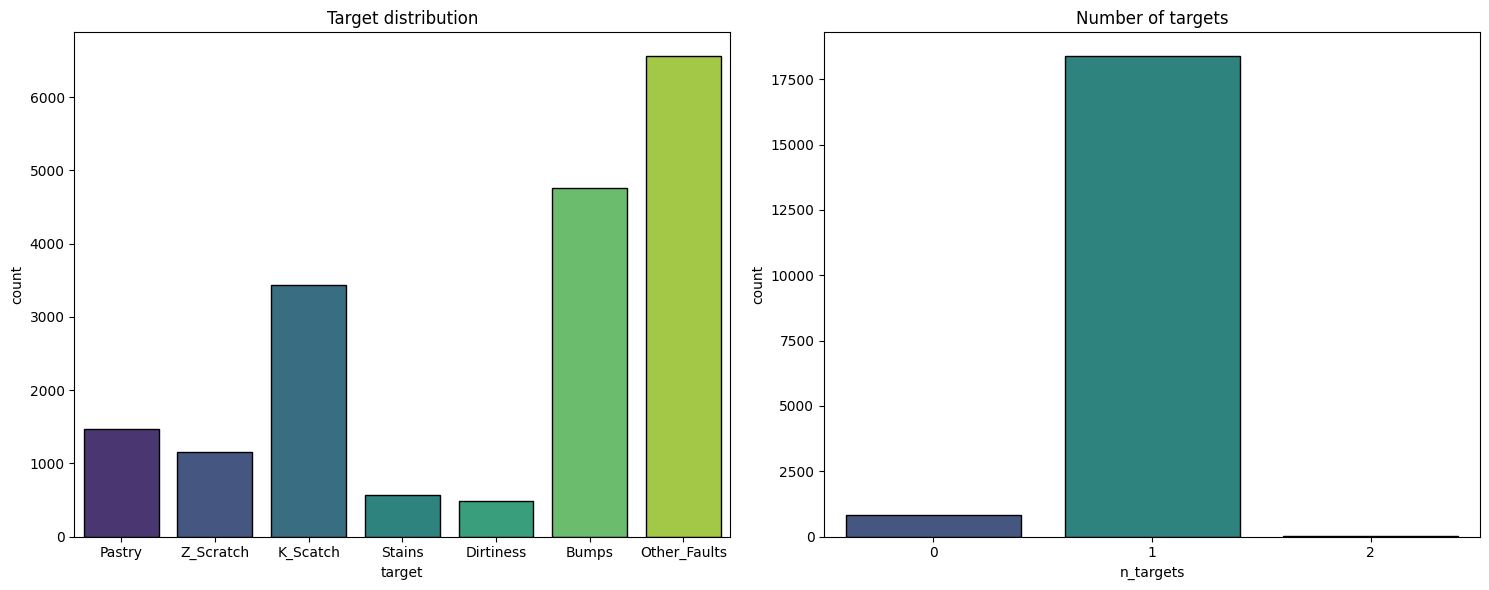

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

target_counts = train[targets].sum().to_frame().reset_index().rename(columns={'index':'target',0:'count'})
target_unique = train[targets].sum(axis='columns').value_counts().sort_index().to_frame().reset_index().rename(columns={'index':'n_targets',0:'count'})

sns.barplot(data=target_counts, x='target', y='count', ax=ax[0], palette='viridis', edgecolor='black')
sns.barplot(data=target_unique, x='n_targets', y='count', ax=ax[1], palette='viridis', edgecolor='black')

ax[0].set_title('Target distribution')
ax[1].set_title('Number of targets')

plt.tight_layout()

record where defect > 1 is very less, hence we are dropping these rows.
since most record has either 0 or 1 defect . this can be treated as a mutli class problem rather than multi label problem

In [16]:
train = train.loc[train[targets].sum(axis='columns') <=1]

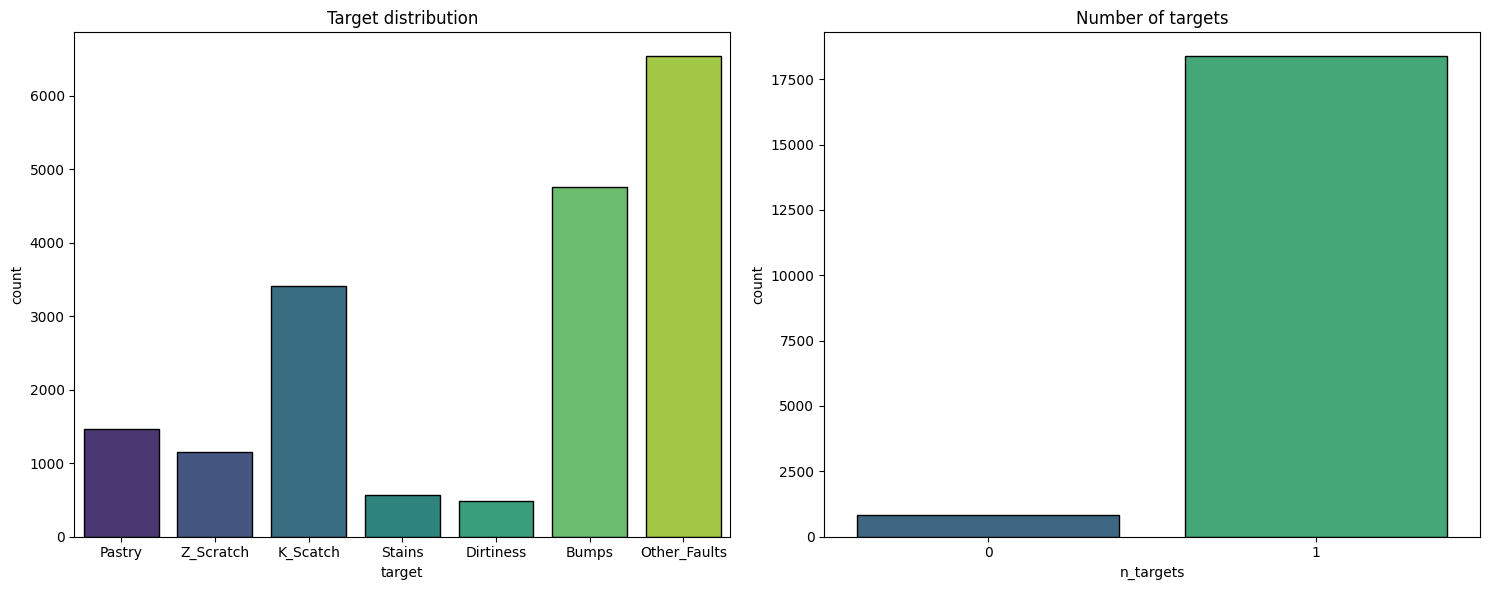

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

target_counts = train[targets].sum().to_frame().reset_index().rename(columns={'index':'target',0:'count'})
target_unique = train[targets].sum(axis='columns').value_counts().sort_index().to_frame().reset_index().rename(columns={'index':'n_targets',0:'count'})

sns.barplot(data=target_counts, x='target', y='count', ax=ax[0], palette='viridis', edgecolor='black')
sns.barplot(data=target_unique, x='n_targets', y='count', ax=ax[1], palette='viridis', edgecolor='black')

ax[0].set_title('Target distribution')
ax[1].set_title('Number of targets')

plt.tight_layout()

In [18]:
target_matrix = train[targets]
target_matrix.shape


(19198, 7)

In [19]:
train = train.drop(targets,axis='columns')
train

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
id,,,,,,,,,,,,,,,,,,,,,
0,6.372,6.382,13.721,13.721,2.833,2.197,1.792,7.730,0.979,0.800,...,0.006,1.732,0.762,0.0,-1.669,-0.875,-1.703,-1.236,1.063,-1.295
1,6.696,6.706,13.499,13.499,6.073,3.045,4.007,10.703,-0.514,-1.243,...,0.004,-1.640,0.762,1.0,0.214,-1.142,0.845,1.311,-1.341,1.135
2,3.689,5.263,14.609,14.609,9.340,6.560,6.043,14.087,-1.938,0.870,...,0.102,-1.702,-2.018,0.0,2.081,1.852,2.021,-0.232,0.365,1.289
3,6.662,6.672,15.025,15.025,5.352,2.833,3.401,8.072,1.014,0.377,...,0.004,-1.078,0.450,1.0,-0.199,-1.142,0.103,1.156,0.816,-0.510
4,7.340,7.353,13.335,13.335,6.258,4.290,4.220,10.784,-0.098,-1.243,...,0.019,-1.818,0.699,1.0,0.389,0.219,1.211,1.667,-0.890,1.288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,6.620,6.631,11.872,11.872,2.890,1.609,1.609,7.693,1.291,0.800,...,0.004,1.732,-0.143,0.0,-1.634,-1.142,-1.942,-0.504,1.186,-0.848
19215,6.585,6.601,14.727,14.727,5.447,2.890,3.296,10.209,0.666,0.307,...,0.006,0.533,0.407,1.0,-0.144,-0.580,0.062,1.270,0.328,-0.103
19216,1.946,3.466,14.272,14.272,6.661,4.745,4.595,11.172,-1.521,-2.441,...,0.020,-1.927,0.560,1.0,0.550,0.254,1.182,1.372,-2.409,1.288


In [20]:
#matrix multiplicatio 
# A = [19198x7] B = [7X1] 
# np.arrange(target_matrix.shape[1]+1) gives = [1, 2, 3, 4, 5, 6, 7]) ---> we are converting into a multi class classification
target = target_matrix@(np.arange(target_matrix.shape[1]) + 1) 
target

id
0        4
1        7
2        3
3        3
4        7
        ..
19214    4
19215    7
19216    1
19217    7
19218    6
Length: 19198, dtype: int64

In [21]:
X = train[features]
y = target

In [22]:
test = test[features]

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19198 entries, 0 to 19218
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   X_Minimum              19198 non-null  float64 
 1   X_Maximum              19198 non-null  float64 
 2   Y_Minimum              19198 non-null  float64 
 3   Y_Maximum              19198 non-null  float64 
 4   Pixels_Areas           19198 non-null  float64 
 5   X_Perimeter            19198 non-null  float64 
 6   Y_Perimeter            19198 non-null  float64 
 7   Sum_of_Luminosity      19198 non-null  float64 
 8   Minimum_of_Luminosity  19198 non-null  float64 
 9   Maximum_of_Luminosity  19198 non-null  float64 
 10  Length_of_Conveyer     19198 non-null  float64 
 11  Steel_Plate_Thickness  19198 non-null  float64 
 12  Edges_Index            19198 non-null  float64 
 13  Empty_Index            19198 non-null  float64 
 14  Square_Index           19198 non-null  floa

In [24]:
category_mapping = {'TypeOfSteel_A300' : 'int64',
                    'TypeOfSteel_A400' : 'int64',
                    'Outside_Global_Index': 'int64'}

# X.TypeOfSteel_A300 = X.TypeOfSteel_A300.astype('int64')
# X.TypeOfSteel_A400 = X.TypeOfSteel_A400.astype('int64')
# X.Outside_Global_Index = X.Outside_Global_Index.astype('int64')


In [25]:

X = X.astype(category_mapping)
test = test.astype(category_mapping)

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19198 entries, 0 to 19218
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              19198 non-null  float64
 1   X_Maximum              19198 non-null  float64
 2   Y_Minimum              19198 non-null  float64
 3   Y_Maximum              19198 non-null  float64
 4   Pixels_Areas           19198 non-null  float64
 5   X_Perimeter            19198 non-null  float64
 6   Y_Perimeter            19198 non-null  float64
 7   Sum_of_Luminosity      19198 non-null  float64
 8   Minimum_of_Luminosity  19198 non-null  float64
 9   Maximum_of_Luminosity  19198 non-null  float64
 10  Length_of_Conveyer     19198 non-null  float64
 11  Steel_Plate_Thickness  19198 non-null  float64
 12  Edges_Index            19198 non-null  float64
 13  Empty_Index            19198 non-null  float64
 14  Square_Index           19198 non-null  float64
 15  Outside

In [26]:
y.unique()

array([4, 7, 3, 6, 1, 0, 2, 5], dtype=int64)

In [27]:
print(X.shape)
print(y.shape)

(19198, 27)
(19198,)


In [28]:
print(test.head())
print(test.shape)

       X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter   
id                                                                             
19219      6.924      6.941     15.157     15.157         6.492        3.178  \
19220      7.137      7.148     12.948     12.948         5.916        3.296   
19221      7.215      7.225     11.676     11.676         5.670        3.611   
19222      5.069      5.130     12.356     12.356         4.394        2.398   
19223      6.328      6.385     13.207     13.207         4.949        2.996   

       Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity   
id                                                             
19219        3.850             11.041                 -0.611  \
19220        3.367             10.579                  0.260   
19221        3.497             10.288                  0.573   
19222        2.485              9.058                  0.782   
19223        2.773              9.650                  

Modelling

In [29]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X,y)
df= xgb.predict_proba(test)    # 12814 x 8 records where 0 being no defect at all for the gicen record
#output is [n_samples,n_class] where with probability of each data of being a given class

In [30]:
# from sklearn.model_selection import train_test_split
# from xgboost import XGBClassifier
# import optuna
# from sklearn.metrics import accuracy_score
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# def objective(trial):
#     params = {
#         'objective': 'binary:logistic',
#         'eval_metric': 'merror',
#         'booster': 'gbtree',
#         'lambda': trial.suggest_loguniform('lambda', 1e-8, 1.0),
#         'alpha': trial.suggest_loguniform('alpha', 1e-8, 1.0),
#         'max_depth': trial.suggest_int('max_depth', 1, 9),
#         'eta': trial.suggest_loguniform('eta', 1e-8, 1.0),
#         'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
#         'grow_policy': trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide'])


#         }
#     model = XGBClassifier(**params)
#     model.fit(X,y,eval_set=[(X_valid,y_valid)], early_stopping_rounds=100, verbose=False)
#     y_pred = model.predict(X_valid)
#     accuracy = accuracy_score(y_valid,y_pred)

#     return 1.0-accuracy


In [32]:
# # Perform hyperparameter optimization with Optuna
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)

# # Print the best hyperparameters found
# print('Best hyperparameters:', study.best_params)


In [33]:
# a = study.best_params
# a

In [34]:
# model = XGBClassifier(a)
# model.fit(X,y)
# df = model.predict_proba(test)

In [35]:
df = pd.DataFrame(df[:,1:])
df

,0,1,2,3,4,5,6
0,5.915e-01,2.208e-04,6.466e-04,5.222e-06,1.368e-02,1.134e-01,0.266
1,2.599e-01,2.614e-03,1.514e-03,2.831e-05,1.257e-01,8.282e-02,0.452
2,5.728e-04,1.673e-02,3.487e-02,6.295e-05,5.628e-04,3.208e-01,0.554
3,1.837e-01,4.910e-05,3.964e-05,2.679e-05,1.212e-03,5.328e-01,0.223
4,5.280e-04,5.743e-05,3.049e-05,4.683e-04,2.289e-03,5.591e-01,0.406
...,...,...,...,...,...,...,...
12809,2.770e-02,3.691e-01,6.194e-04,1.382e-05,3.569e-02,2.097e-01,0.285
12810,7.809e-02,4.501e-04,1.040e-02,2.716e-03,1.037e-01,3.219e-01,0.466
12811,1.356e-04,8.158e-05,9.474e-01,4.628e-06,1.777e-05,1.236e-04,0.046
12812,3.755e-01,5.837e-03,1.942e-02,6.680e-06,1.176e-02,1.413e-01,0.404


In [36]:
df = df.rename(
    columns = {
        0: 'Pastry',
        1: 'Z_Scratch',
        2: 'K_Scatch',
        3: 'Stains',
        4: 'Dirtiness',
        5: 'Bumps',
        6: 'Other_Faults'
    }
)

In [37]:
df

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,5.915e-01,2.208e-04,6.466e-04,5.222e-06,1.368e-02,1.134e-01,0.266
1,2.599e-01,2.614e-03,1.514e-03,2.831e-05,1.257e-01,8.282e-02,0.452
2,5.728e-04,1.673e-02,3.487e-02,6.295e-05,5.628e-04,3.208e-01,0.554
3,1.837e-01,4.910e-05,3.964e-05,2.679e-05,1.212e-03,5.328e-01,0.223
4,5.280e-04,5.743e-05,3.049e-05,4.683e-04,2.289e-03,5.591e-01,0.406
...,...,...,...,...,...,...,...
12809,2.770e-02,3.691e-01,6.194e-04,1.382e-05,3.569e-02,2.097e-01,0.285
12810,7.809e-02,4.501e-04,1.040e-02,2.716e-03,1.037e-01,3.219e-01,0.466
12811,1.356e-04,8.158e-05,9.474e-01,4.628e-06,1.777e-05,1.236e-04,0.046
12812,3.755e-01,5.837e-03,1.942e-02,6.680e-06,1.176e-02,1.413e-01,0.404


In [38]:
submission_df = pd.DataFrame(df)
submission_df.index = test.index
submission_df

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
id,,,,,,,
19219,5.915e-01,2.208e-04,6.466e-04,5.222e-06,1.368e-02,1.134e-01,0.266
19220,2.599e-01,2.614e-03,1.514e-03,2.831e-05,1.257e-01,8.282e-02,0.452
19221,5.728e-04,1.673e-02,3.487e-02,6.295e-05,5.628e-04,3.208e-01,0.554
19222,1.837e-01,4.910e-05,3.964e-05,2.679e-05,1.212e-03,5.328e-01,0.223
19223,5.280e-04,5.743e-05,3.049e-05,4.683e-04,2.289e-03,5.591e-01,0.406
...,...,...,...,...,...,...,...
32028,2.770e-02,3.691e-01,6.194e-04,1.382e-05,3.569e-02,2.097e-01,0.285
32029,7.809e-02,4.501e-04,1.040e-02,2.716e-03,1.037e-01,3.219e-01,0.466
32030,1.356e-04,8.158e-05,9.474e-01,4.628e-06,1.777e-05,1.236e-04,0.046


In [39]:
submission_df.to_csv('submission_xgboost_scaled.csv')

In [ ]:
# Submission score = 0.88010